/home/DM19/anaconda3/envs/centermask/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.13257408142089844
(256, 256) 2 0


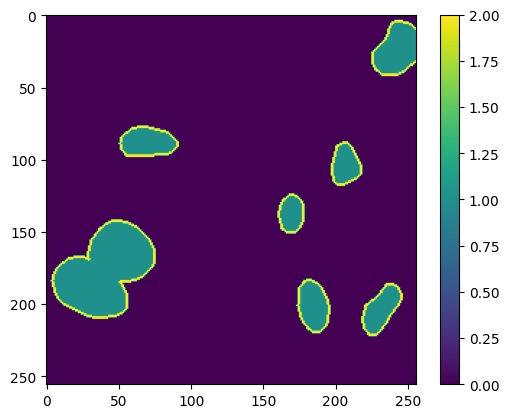

(256, 256) 1.0 0.0


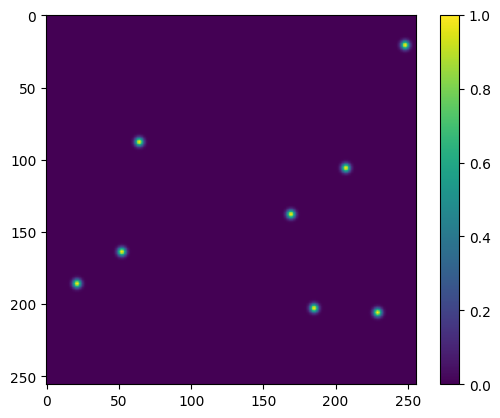

(256, 256) 8 0


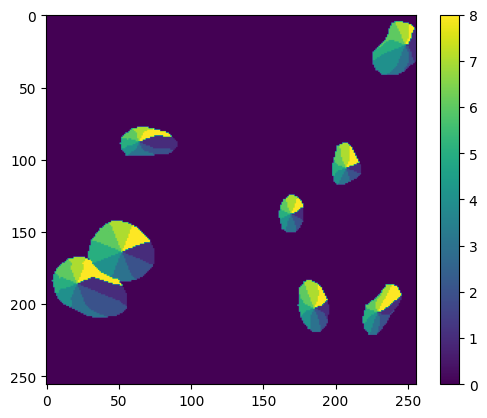

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from CDNetDataset import generate_CDNET_target

data = np.load('/home/DM19/workspace/workplace/data/PANNUKE/masks.npy')[0]
from time import time

s = time()
out =generate_CDNET_target(data[...,0])
print(time()-s)
for o in out:
    print(o.shape,o.max(),o.min())
    plt.imshow(o)
    plt.colorbar()
    plt.show() 


In [6]:
a = np.array([[1,2,3],[4,5,9],[7,8,9]])
print(a.argmax())
print([np.unravel_index(a.argmax(),a.shape)])

5
[(1, 2)]


(256, 256) 1.0 0.0


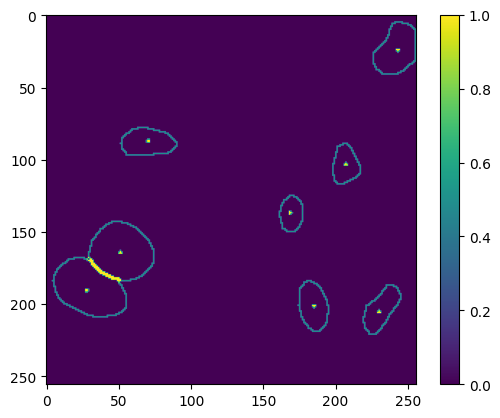

In [3]:
# postprocess

from skimage.morphology import dilation, disk, erosion, remove_small_objects
from scipy.ndimage import binary_fill_holes,label
from data_prepare.getDirectionDiffMap import generate_dd_map

p_d_m = generate_dd_map(out[2],9)
print(p_d_m.shape,p_d_m.max(),p_d_m.min())

plt.imshow(p_d_m)
plt.colorbar()
plt.show()




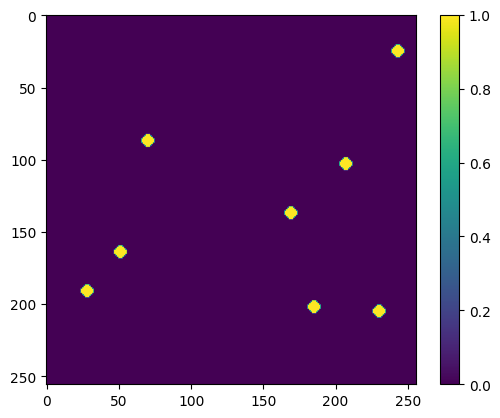

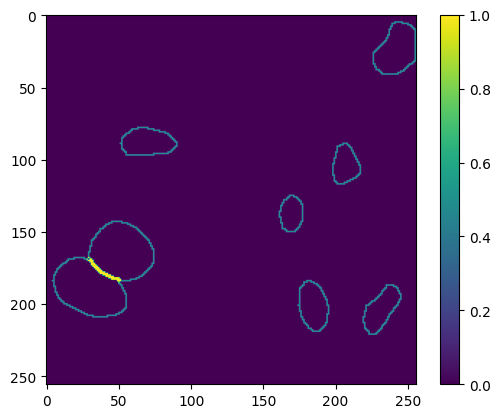

In [4]:
point = (out[1]>0.2)*1.0
point = dilation(point,disk(1))
point_direction = p_d_m*point
boundry = p_d_m - point_direction
plt.imshow(point)
plt.colorbar()
plt.show()


plt.imshow(boundry)
plt.colorbar()
plt.show()



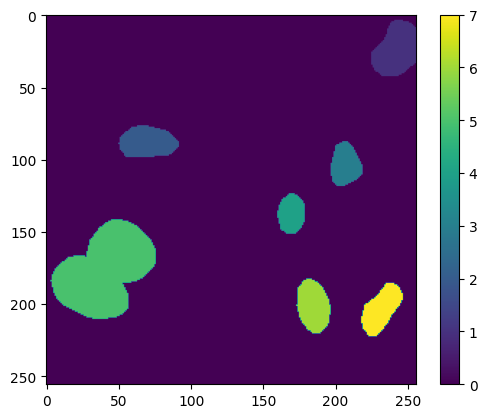

In [6]:
import numpy as np
from skimage import morphology,measure

data = np.load('/home/DM19/workspace/workplace/data/PANNUKE/masks.npy')[0:2,...,0] #n,h,w
data = (data!= 0 )*1
data =morphology.remove_small_objects(data,5)
data = measure.label(data)

data[0] = morphology.dilation(data[0],morphology.disk(1))

import matplotlib.pyplot as plt

plt.imshow(data[0])
plt.colorbar()
plt.show()


Loading dataset from /home/DM19/workspace/BRBNet/data/PanNuke
Dataset loaded


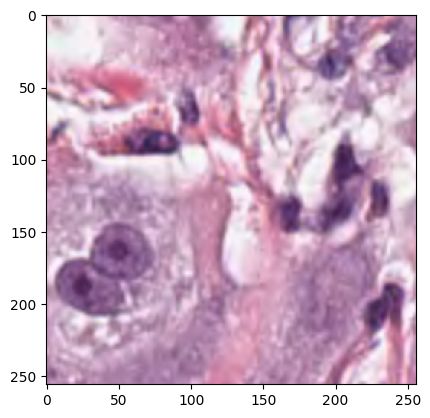

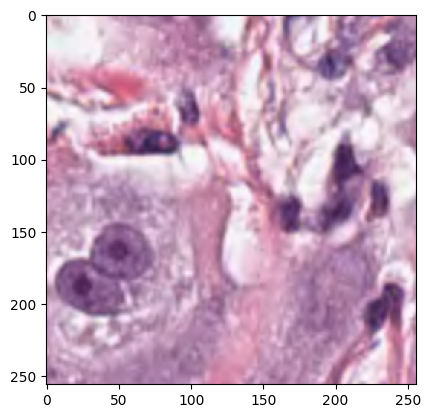

In [5]:
from CDNetDataset import CDNetDataset_PANNUKE
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

ds = CDNetDataset_PANNUKE('/home/DM19/workspace/BRBNet/data/PanNuke')
img, classes_label, boundry, point, direction = ds[0]
plt.imshow(img.numpy().transpose(1,2,0))
plt.show()
img2 = Image.open('/home/DM19/workspace/BRBNet/data/PanNuke/images/00000.png')
img2 = np.array(img2)
plt.imshow(img2)
plt.show() 